<a href="https://colab.research.google.com/github/doissegundos/Titanic_Machine_Learning_Kaggle/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic - Machine Learning from Disaster
Link do dataset: https://www.kaggle.com/c/titanic/overview


### Leitura dos dados

In [39]:
import numpy as np
import os
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import sys
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [40]:
#Importando o dataset do Github
df_train = pd.read_csv('https://raw.githubusercontent.com//doissegundos/Titanic_Machine_Learning_Kaggle/main/dataset/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com//doissegundos/Titanic_Machine_Learning_Kaggle/main/dataset/test.csv')
df_testY = pd.read_csv('https://raw.githubusercontent.com//doissegundos/Titanic_Machine_Learning_Kaggle/main/dataset/gender_submission.csv')

In [41]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.05,NaN,S
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.65,NaN,S
555,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.55,NaN,S
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.50,NaN,S


In [42]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S
137,1029,2,"Schmidt, Mr. August",male,26.0,0,0,248659,13.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
376,1268,3,"Kink, Miss. Maria",female,22.0,2,0,315152,8.6625,NaN,S
303,1195,3,"Pokrnic, Mr. Tome",male,24.0,0,0,315092,8.6625,NaN,S


In [43]:
df_testY.sample(5)

,PassengerId,Survived
285,1177,0
233,1125,0
402,1294,1
200,1092,1
392,1284,0


Verificando os dados nulos

In [44]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Informações sobre o dataset

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Age

A coluna idade contém muitos valores nulos, com isso vamos substituir os valores nulos pela media da idade.

In [47]:
#media da idade dos passageiros
int(df_train['Age'].mean())

29

In [48]:
df_train['Age'] = df_train['Age'].fillna(int(df_train['Age'].mean()))
df_test['Age'] = df_test['Age'].fillna(int(df_test['Age'].mean()))

É importante converter a coluna de idade para o tipo inteiro

In [49]:
df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

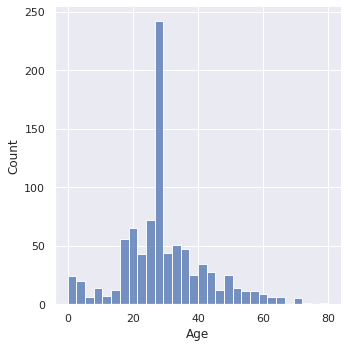

In [52]:
#Distribuição da idade dos passageiros
sns.set_theme(style="darkgrid")
sns.displot(data=df_train, x="Age")

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


#### Sex

É importante categorizar o sexo dos passageiros:

 0 - Mulher

 1 - Homem

In [54]:
#Para o dataset de treinamento
df_train["SexC"] = np.nan
df_train.loc[df_train.Sex == 'male', 'SexC'] = 1
df_train.loc[df_train.Sex == 'female', 'SexC'] = 0
df_train['SexC'] = df_train['SexC'].astype(int)

In [55]:
#Para o dataset de teste
df_test["SexC"] = np.nan
df_test.loc[df_test.Sex == 'male', 'SexC'] = 1
df_test.loc[df_test.Sex == 'female', 'SexC'] = 0
df_test['SexC'] = df_test['SexC'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



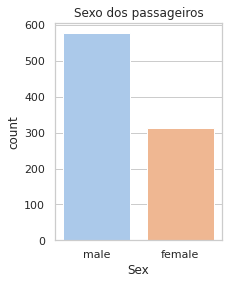

In [56]:
plt.figure(figsize=(3, 4))
sns.set_theme(style="whitegrid")
sns.countplot('Sex',data=df_train,palette="pastel")
plt.title('Sexo dos passageiros') 
plt.show()

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  SexC         418 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 39.3+ KB


In [58]:
df_train.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexC
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40,0,0,PC 17582,153.4625,C125,S,0
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6,0,1,248727,33.0000,NaN,S,0
495,496,0,3,"Yousseff, Mr. Gerious",male,29,0,0,2627,14.4583,NaN,C,1
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16,2,0,345764,18.0000,NaN,S,1
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33,1,2,C.A. 34651,27.7500,NaN,S,0
866,867,1,2,"Duran y More, Miss. Asuncion",female,27,1,0,SC/PARIS 2149,13.8583,NaN,C,0
404,405,0,3,"Oreskovic, Miss. Marija",female,20,0,0,315096,8.6625,NaN,S,0
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59,0,0,237442,13.5000,NaN,S,1


#### Embarked

A coluna Embarked contém 3 itens, que serão substituidos por valores numericos e inteiros.

0 - C

1 - Q

2 - s

In [71]:
df_train.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,SexC,EmbarkedC
Embarked,,,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,69,168,168
Q,77,77,77,77,77,77,77,77,77,77,4,77,0
S,646,646,646,646,646,646,646,646,646,646,131,646,646


In [72]:
df_test.groupby(['Embarked']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,SexC
Embarked,,,,,,,,,,,
C,102,102,102,102,102,102,102,102,102,49,102
Q,46,46,46,46,46,46,46,46,46,1,46
S,270,270,270,270,270,270,270,270,269,41,270


Substituir valores nulos pelo que mais se repede dentro do dataset

In [73]:
df_train['Embarked'] = df_train['Embarked'].fillna("S")
df_test['Embarked'] = df_test['Embarked'].fillna("S")

In [76]:
#Para o dataset de treinamento
df_train["EmbarkedC"] = np.nan
df_train.loc[df_train.Embarked == 'C', 'EmbarkedC'] = 0
df_train.loc[df_train.Embarked == 'Q', 'EmbarkedC'] = 1
df_train.loc[df_train.Embarked == 'S', 'EmbarkedC'] = 2
df_train['EmbarkedC'] = df_train['EmbarkedC'].astype(int)

In [77]:
#Para o dataset de teste
df_test["EmbarkedC"] = np.nan
df_test.loc[df_test.Embarked == 'C', 'EmbarkedC'] = 0
df_test.loc[df_test.Embarked == 'Q', 'EmbarkedC'] = 1
df_test.loc[df_test.Embarked == 'S', 'EmbarkedC'] = 2
df_test['EmbarkedC'] = df_test['EmbarkedC'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



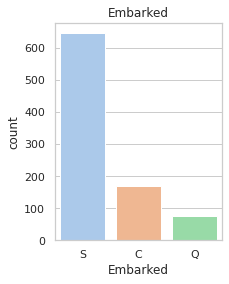

In [79]:
plt.figure(figsize=(3, 4))
sns.set_theme(style="whitegrid")
sns.countplot('Embarked',data=df_train,palette="pastel")
plt.title('Embarked') 
plt.show()

In [80]:
df_train.sample(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexC,EmbarkedC
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40,1,0,7546,9.4750,NaN,S,0,2
530,531,1,2,"Quick, Miss. Phyllis May",female,2,1,1,26360,26.0000,NaN,S,0,2
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19,0,0,349205,7.8958,NaN,S,1,2
535,536,1,2,"Hart, Miss. Eva Miriam",female,7,0,2,F.C.C. 13529,26.2500,NaN,S,0,2
236,237,0,2,"Hold, Mr. Stephen",male,44,1,0,26707,26.0000,NaN,S,1,2
239,240,0,2,"Hunt, Mr. George Henry",male,33,0,0,SCO/W 1585,12.2750,NaN,S,1,2
797,798,1,3,"Osman, Mrs. Mara",female,31,0,0,349244,8.6833,NaN,S,0,2
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21,0,0,350029,7.8542,NaN,S,1,2
176,177,0,3,"Lefebre, Master. Henry Forbes",male,29,3,1,4133,25.4667,NaN,S,1,2
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37,2,0,3101276,7.9250,NaN,S,1,2


#### Age